# Selection

For further reference see: [here](https://awon8465.github.io/gagadoc/tuning-the-ga/selection.html)

The aim of this demonstration is to help you with designing a selection method for you genetic algorithm. We will use Rosenbrock's banana function.

This is defined by:

$f(x,y) = (a-x)^2 + b(y - x^2)^2$

For the constants $a = 1$ and $b = 100$, the minimum is at (1,1).

$f(1,1) = 0$
<p align = "center">
  <img src="Rosenbrock_function.png" width="40%">
</p>

Image source:[wikipedia](https://en.wikipedia.org/wiki/Rosenbrock_function) 

In [5]:
import gaga as ga
from matplotlib import rc
rc('animation', html='html5')

results_folder = 'demo-selection'

genes = {'x':(-2, 2),
        'y':(-1, 3)}

def evaluate(individual):

    # constants
    a = 1
    b = 100

    #  unpack chromosome
    x = individual.genes['x']
    y = individual.genes['y']

    individual.fitness_score = (pow(a - x, 2) + b * pow(y - pow(x, 2), 2))

## Tournament selection

By default:

``selection = 'tournament'``

Play around with the code below.

| Selection pressure    | ``winrate =``|
|-----------------------|--------------|
|High selection pressure|``0.9``       |
|Good selection pressure|``0.7``       |
|No selection pressure  |``0.5``       |
|Negative selection pressure|``<0.5``|



<Figure size 432x288 with 0 Axes>

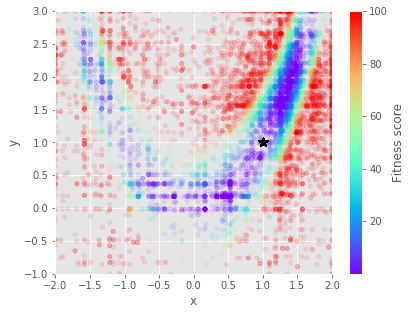

In [3]:
seed = 0
winrate = 0.7
sim = ga.ga(genes, 
            evaluate,
            clone = 0,
            epoch = 250,
            population_size = 40,
            sigma = 0.5,
            winrate = winrate,
            results_folder = results_folder)
sim.run_simulation(seed = seed)
anim = sim.results.animate('x', 'y', 
                            bounds = [-2, 2, -1, 3], s = 20, 
                            alpha = 0.1, optimum = [1, 1], fmax = 100, 
                            filename = "tournament_{}_{}".format(winrate, seed))

## Roulette wheel selection

``selection = 'roulette_wheel'``


<Figure size 432x288 with 0 Axes>

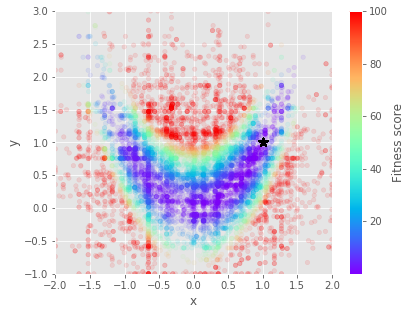

In [7]:
sim = ga.ga(genes, 
            evaluate,
            clone = 0,
            epoch = 250,
            population_size = 40,
            sigma = 0.5,
            selection = 'roulette_wheel',
            results_folder = results_folder)
sim.run_simulation(seed = 0)
anim = sim.results.animate('x', 'y', 
                            bounds = [-2, 2, -1, 3], s = 20, 
                            alpha = 0.1, optimum = [1, 1], fmax = 100, 
                            filename = "roulette_{}".format(seed))